In [1]:
# importing the libraries 

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as plt1

#loading the data from the csv file
cust_data=pd.read_csv("loan.csv")
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


C:\Users\lokes\AppData\Local\Temp\ipykernel_26864\1163031722.py:10: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  cust_data=pd.read_csv("D:/upgrad_projects/case_study_1/loan.csv")


**Listing the completely empty columns as this will be of no use in the analysis**

In [3]:
empty_columns=cust_data.columns[cust_data.isna().all()]
empty_columns.size

54

In [4]:
#removed the 54 columns which are completely empty 
cust_cleaned=cust_data.dropna(axis=1,how='all')
cust_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

**calculating the percentage of null values in the column, so that the column with higer percentage can be removed**

In [6]:
cust_cleaned.isna().mean()*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [7]:
#mths_since_last_delinq, mths_since_last_record ,next_pymnt_d   has more the 30% of values as null values so removing the columns

cust_cleaned=cust_cleaned.drop(labels=["mths_since_last_delinq","mths_since_last_record","next_pymnt_d","desc"],axis=1);
cust_cleaned.isna().mean()*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [8]:
cust_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [9]:
cust_cleaned.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
# checking the unique values in the column
cust_cleaned['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [11]:
#removing the row with the loan status as current because we cannot determine anything with the loan which is in current status

cust_cleaned=cust_cleaned[cust_cleaned['loan_status']!='Current']
cust_cleaned['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [12]:
cust_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  38577 no

In [13]:
#Identify the columns with the unique values, and remove it as it will not be of any use in analysis 
unique_columns=cust_cleaned.columns[cust_cleaned.nunique(dropna=False)==len(cust_cleaned)]
unique_columns

Index(['id', 'member_id', 'url'], dtype='object')

In [14]:
cust_cleaned=cust_cleaned.drop(labels=['id','member_id','url'],axis=1)

In [15]:
#Removing the columns which is not needed for the analysis 
#Zip code only first 3 characters are visible 
#pymnt_plan column as it has sinle value n
#application_type this column has only one value as INDIVIDUAL 
#policy_code column has single constant value 1
#delinq_amnt column has single constant value 0
#tax_liens column has single constant value 0.0 and nan
#initial_list_status column has single constant value f
#collections_12_mths_ex_med column has single constant value 0.0 and nan
#acc_now_delinq' column has single constant value 0
#chargeoff_within_12_mths column has  a single constant value 0.0 and nan


print(cust_cleaned['zip_code'].unique())
print(cust_cleaned['pymnt_plan'].unique())
print(cust_cleaned['application_type'].unique())
print(cust_cleaned['policy_code'].unique())
print(cust_cleaned['delinq_amnt'].unique())
print(cust_cleaned['tax_liens'].unique())
print(cust_cleaned['initial_list_status'].unique())
print(cust_cleaned['collections_12_mths_ex_med'].unique())
print(cust_cleaned['acc_now_delinq'].unique())
print(cust_cleaned['chargeoff_within_12_mths'].unique())


['860xx' '309xx' '606xx' '917xx' '852xx' '280xx' '900xx' '958xx' '774xx'
 '853xx' '913xx' '245xx' '951xx' '641xx' '921xx' '067xx' '890xx' '770xx'
 '335xx' '799xx' '605xx' '103xx' '150xx' '326xx' '564xx' '141xx' '080xx'
 '974xx' '934xx' '405xx' '946xx' '445xx' '850xx' '292xx' '088xx' '180xx'
 '029xx' '700xx' '010xx' '441xx' '104xx' '061xx' '616xx' '947xx' '914xx'
 '765xx' '980xx' '017xx' '972xx' '752xx' '787xx' '077xx' '540xx' '225xx'
 '440xx' '437xx' '559xx' '912xx' '325xx' '300xx' '923xx' '352xx' '013xx'
 '146xx' '074xx' '786xx' '937xx' '331xx' '115xx' '191xx' '114xx' '908xx'
 '902xx' '750xx' '950xx' '329xx' '226xx' '992xx' '614xx' '083xx' '100xx'
 '926xx' '931xx' '712xx' '060xx' '707xx' '342xx' '604xx' '895xx' '430xx'
 '919xx' '996xx' '891xx' '935xx' '801xx' '928xx' '233xx' '927xx' '970xx'
 '211xx' '303xx' '070xx' '194xx' '263xx' '403xx' '301xx' '553xx' '993xx'
 '312xx' '432xx' '602xx' '216xx' '151xx' '971xx' '305xx' '334xx' '050xx'
 '129xx' '925xx' '483xx' '760xx' '961xx' '200xx' '0

In [16]:
cust_cleaned=cust_cleaned.drop(labels=['pymnt_plan','application_type','policy_code','delinq_amnt','tax_liens','initial_list_status','collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths'],axis=1)
cust_cleaned.info();

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_title                36191 non-null  object 
 9   emp_length               37544 non-null  object 
 10  home_ownership           38577 non-null  object 
 11  annual_inc               38577 non-null  float64
 12  verification_status      38577 non-null  object 
 13  issue_d                  38577 non-null  object 
 14  loan_status              38

In [17]:
#recoveries column has 90% of the values as 0
#collection_recovery_fee has most of the values as 0
#total_rec_late_fee has most of the values as 0
print(cust_cleaned['recoveries'].value_counts(normalize=True)*100)
print(cust_cleaned['collection_recovery_fee'].value_counts(normalize=True)*100)
print(cust_cleaned['total_rec_late_fee'].value_counts(normalize=True)*100)

recoveries
0.00       89.066024
11.29       0.010369
10.40       0.010369
10.66       0.007777
44.92       0.007777
             ...    
764.69      0.002592
653.08      0.002592
1080.96     0.002592
878.19      0.002592
21.29       0.002592
Name: proportion, Length: 4040, dtype: float64
collection_recovery_fee
0.0000      90.196231
2.0000       0.031107
1.2000       0.025922
3.7100       0.023330
1.8800       0.020738
              ...    
3.7900       0.002592
773.4900     0.002592
272.8250     0.002592
1.7697       0.002592
0.2300       0.002592
Name: proportion, Length: 2616, dtype: float64
total_rec_late_fee
0.000000     94.828525
15.000000     0.635093
15.000000     0.150349
30.000000     0.134795
15.000000     0.121834
               ...    
14.961402     0.002592
58.363879     0.002592
14.987723     0.002592
40.237503     0.002592
19.890000     0.002592
Name: proportion, Length: 1320, dtype: float64


In [18]:
cust_cleaned=cust_cleaned.drop(labels=['recoveries','collection_recovery_fee','total_rec_late_fee','emp_title'],axis=1)
cust_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  title                 38

In [19]:
#checking the column with null values 
cust_cleaned.isna().mean()*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.028514
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.129611
total_acc               0.000000
out_prncp               0.000000
out_prncp_inv           0.000000
total_pymnt             0.000000
total_pymn

In [20]:
#checking percentage of the purpose for which the loan is availed 
cust_cleaned.purpose.value_counts()*100/len(cust_cleaned)

purpose
debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: count, dtype: float64

**Removing the months from the term column to make it a numerical column**

In [22]:
#removing months from the term column

cust_cleaned["term"]=cust_cleaned["term"].apply(lambda x : x.replace('months',''))
cust_cleaned["term"]=cust_cleaned["term"].astype(int)

In [23]:
# converting int_rate , removing the % symbol

cust_cleaned['int_rate']=cust_cleaned['int_rate'].apply(lambda x :x.replace('%',''))


In [24]:
cust_cleaned['int_rate']=cust_cleaned['int_rate'].astype(float)



In [25]:
cust_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  int32  
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  title                 38

In [26]:
cust_cleaned.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
last_pymnt_d              71
last_pymnt_amn

**The title column has the complete random values, so this column can be dropped and the purpose column can be considered for analysis**

In [28]:
#deleting the title column having random values, purpose column can be considered 
cust_cleaned=cust_cleaned.drop(['title'],axis=1)


In [29]:
cust_cleaned['emp_length_years']=cust_cleaned['emp_length'].str.rstrip('years ')
cust_cleaned['emp_length_years']=cust_cleaned['emp_length_years'].replace('10+','10')
cust_cleaned['emp_length_years']=cust_cleaned['emp_length_years'].replace('< 1','0.9')
cust_cleaned

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,emp_length_years
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,0.0,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,May-16,0.0,10
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,0.0,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,Sep-13,0.0,0.9
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,0.0,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,May-16,0.0,10
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,0.0,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,Apr-16,0.0,10
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,...,0.0,5632.210000,5632.21,5000.00,632.21,Jan-15,161.03,Jan-16,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,4 years,MORTGAGE,...,0.0,2822.969293,1213.88,2500.00,322.97,Jul-10,80.90,Jun-10,NaN,4
39713,8500,8500,875.0,36,10.28,275.38,C,C1,3 years,RENT,...,0.0,9913.491822,1020.51,8500.00,1413.49,Jul-10,281.94,Jul-10,NaN,3
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,< 1 year,MORTGAGE,...,0.0,5272.161128,1397.12,5000.00,272.16,Apr-08,0.00,Jun-07,NaN,0.9
39715,5000,5000,650.0,36,7.43,155.38,A,A2,< 1 year,MORTGAGE,...,0.0,5174.198551,672.66,5000.00,174.20,Jan-08,0.00,Jun-07,NaN,0.9


In [30]:
#analysing pub_rec_bankruptcies column
cust_cleaned['pub_rec_bankruptcies'].isnull().sum()

697

In [31]:
# as null and 0 means the same filling the null values with 0 
cust_cleaned['pub_rec_bankruptcies']=cust_cleaned['pub_rec_bankruptcies'].fillna(0)

In [32]:
cust_cleaned['pub_rec_bankruptcies'].dtypes

dtype('float64')

In [33]:
cust_cleaned.isnull().sum()*100/len(cust_cleaned)

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.129611
total_acc               0.000000
out_prncp               0.000000
out_prncp_inv           0.000000
total_pymnt             0.000000
total_pymnt_inv         0.000000
total_rec_

In [34]:
cust_cleaned['emp_length_years'].isnull().sum()

1033

In [35]:
# emp_length_years null means the employee has 0 years, so populating with the default value of 0
cust_cleaned['emp_length_years']=cust_cleaned['emp_length_years'].fillna(0)


In [36]:
# checking revol_util column for the null values
cust_cleaned['revol_util'].isnull().sum()

50

In [37]:
cust_cleaned['revol_util']=cust_cleaned['revol_util'].apply(lambda x: str(x).replace('%',''))


In [38]:
cust_cleaned['revol_util']=cust_cleaned['revol_util'].astype(float)

In [39]:
cust_cleaned['revol_util'].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [40]:
cust_cleaned["revol_util"]=cust_cleaned["revol_util"].fillna(cust_cleaned["revol_util"].quantile(0.5))

In [41]:
# only few columns are present with null values so removing those columns 
cust_cleaned["last_credit_pull_d"].isnull().sum()
cust_cleaned["last_pymnt_d"].isnull().sum()
 

71

In [42]:
cust_cleaned=cust_cleaned[~cust_cleaned["last_credit_pull_d"].isnull()]
cust_cleaned=cust_cleaned[~cust_cleaned["last_pymnt_d"].isnull()]

In [43]:
#checking percentage of null values again
cust_cleaned.isnull().sum()*100/len(cust_cleaned)

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.669852
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000000
total_acc               0.000000
out_prncp               0.000000
out_prncp_inv           0.000000
total_pymnt             0.000000
total_pymnt_inv         0.000000
total_rec_

In [44]:
# removing employee length column as its been converted to emp_length_years column
cust_cleaned=cust_cleaned.drop(labels=['emp_length'],axis=1)


In [45]:
#checking % of loan status wise 
cust_cleaned.loan_status.value_counts()*100/len(cust_cleaned)




loan_status
Fully Paid     85.572927
Charged Off    14.427073
Name: count, dtype: float64

**Approx 85% of loans are fully paid**

**Approx 14% of loans are defaulters** 

**performing sanity check on funded amount**

In [48]:
# performing sanity check on funded amount 
# as the funded amount cannot be more than the loan amount 
cust_cleaned[cust_cleaned["funded_amnt"] > cust_cleaned ["loan_amnt"]]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,emp_length_years


In [49]:
#Check percentage of the Purpose for which the loans have been availed.
(cust_cleaned.purpose.value_counts()*100)/len(cust_cleaned)

purpose
debt_consolidation    46.815915
credit_card           13.047995
other                 10.009350
home_improvement       7.458965
major_purchase         5.570850
small_business         4.531997
car                    3.893102
wedding                2.389362
medical                1.766050
moving                 1.495948
vacation               0.973925
house                  0.947953
educational            0.836277
renewable_energy       0.262310
Name: count, dtype: float64

**Need to check outliers in numerical columns. Categorical variables represent distinct categories or groups, and the concept of outliers doesn't apply directly to them**

<Axes: ylabel='annual_inc'>

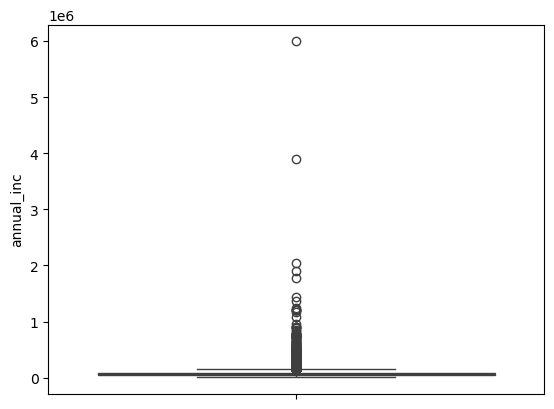

In [51]:
# checking on the outliners in annual income ,as annual income can vary between the users 
sns.boxplot(cust_cleaned['annual_inc'])

**This Clearly indicates the presence of the outlierns**
- The max value is 6M ,lets check on the percentiles of 0.95 and 0.99 before making the decision 



In [53]:
# checking the percentile for annual_inc
cust_cleaned.annual_inc.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    3.850400e+04
mean     6.881818e+04
std      6.426158e+04
min      4.000000e+03
5%       2.400000e+04
10%      3.000000e+04
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
90%      1.151475e+05
95%      1.400040e+05
99%      2.345820e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

**The value after 95% seems to be disconnected**
- so removing the values after the 95%

In [55]:
annual_income_95=cust_cleaned['annual_inc'].quantile(0.95)
cust_cleaned=cust_cleaned[cust_cleaned.annual_inc <= annual_income_95]

<Axes: ylabel='annual_inc'>

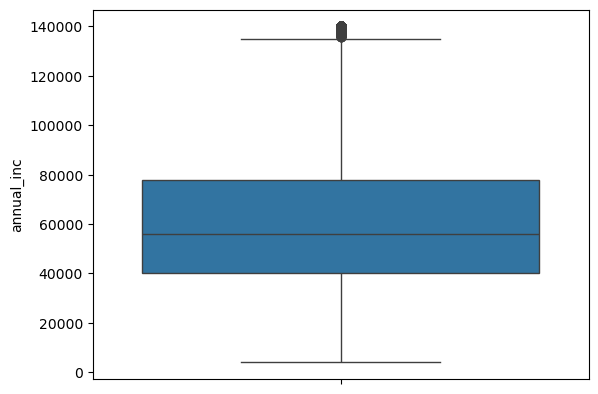

In [56]:
sns.boxplot(cust_cleaned['annual_inc'])

**The annual income data is good without any outliners**
- moving to next numerical column
- checking the dti , loan amount, funded_amnt_inv columns 

<Axes: ylabel='dti'>

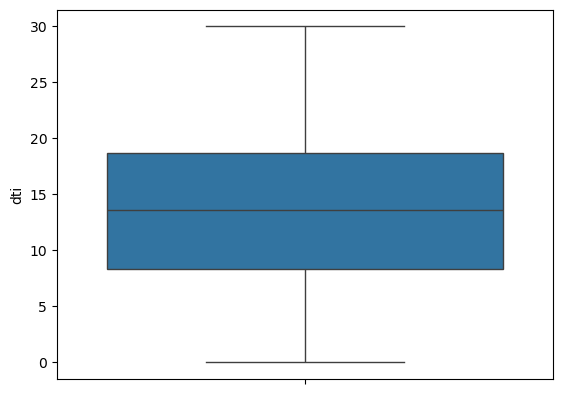

In [58]:
sns.boxplot(cust_cleaned.dti)

<Axes: ylabel='loan_amnt'>

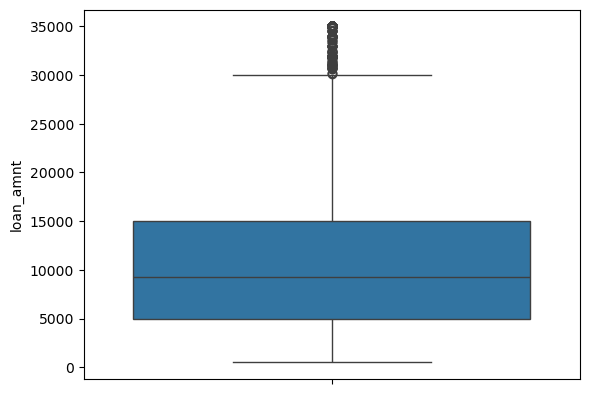

In [59]:
sns.boxplot(cust_cleaned.loan_amnt)

In [60]:
cust_cleaned.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: ylabel='funded_amnt_inv'>

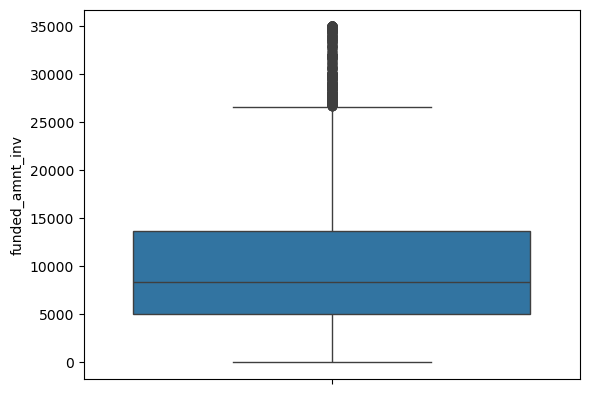

In [61]:
sns.boxplot(cust_cleaned.funded_amnt_inv)

In [62]:
cust_cleaned.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.98,0.99])

0.50     8391.372858
0.75    13644.504000
0.90    19750.000000
0.95    23947.151220
0.97    24975.000000
0.98    27951.461128
0.99    31946.842804
Name: funded_amnt_inv, dtype: float64

- there difference in some values but the distrubution is continous 

**Segmented Univariate Analysis**

- we already have the grade column will analyse the subgrade column 




In [65]:
cust_cleaned.sub_grade=pd.to_numeric(cust_cleaned.sub_grade.apply(lambda x: x[-1]))
cust_cleaned.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

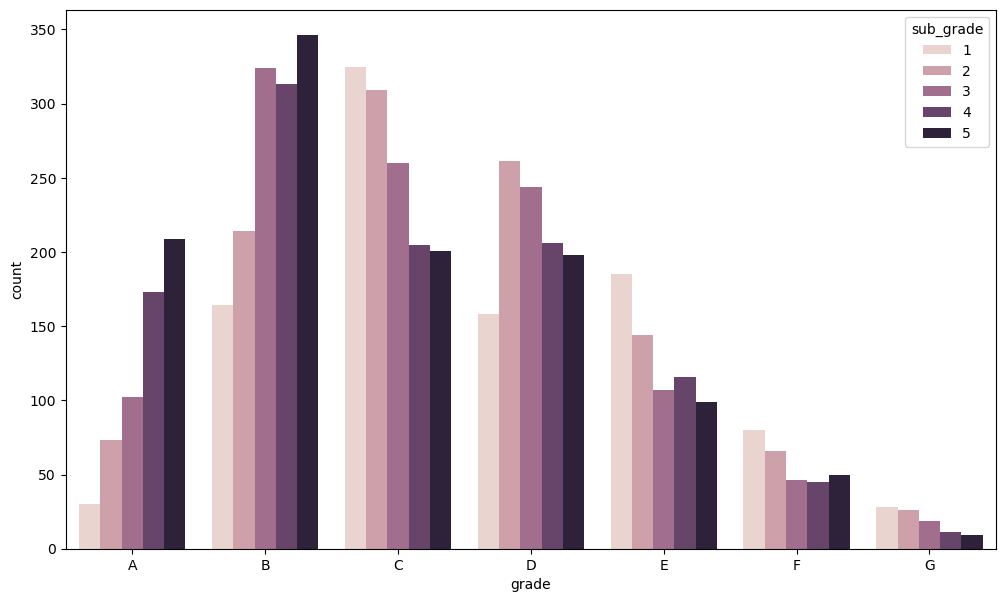

In [66]:
fig,ax=plt.subplots(figsize=(12,7))
sns.countplot(x='grade',order =['A','B','C','D','E','F','G'], hue='sub_grade',data=cust_cleaned[cust_cleaned.loan_status=='Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

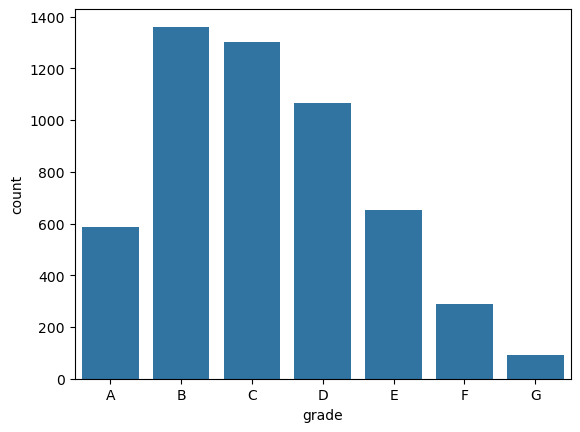

In [67]:
sns.countplot(x='grade',data=cust_cleaned[cust_cleaned.loan_status=='Charged Off'],order=['A','B','C','D','E','F','G'])

**Checking home ownership**

In [69]:
cust_cleaned['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [70]:
cust_cleaned['home_ownership'].value_counts()

home_ownership
RENT        17978
MORTGAGE    15660
OWN          2847
OTHER          93
NONE            3
Name: count, dtype: int64

In [71]:
#only three NONE values are persent replacing the NONE values with Other
cust_cleaned['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

C:\Users\lokes\AppData\Local\Temp\ipykernel_26864\2237881567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cust_cleaned['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)


In [72]:
cust_cleaned['home_ownership'].value_counts()

home_ownership
RENT        17978
MORTGAGE    15660
OWN          2847
OTHER          96
Name: count, dtype: int64

<Axes: xlabel='home_ownership', ylabel='count'>

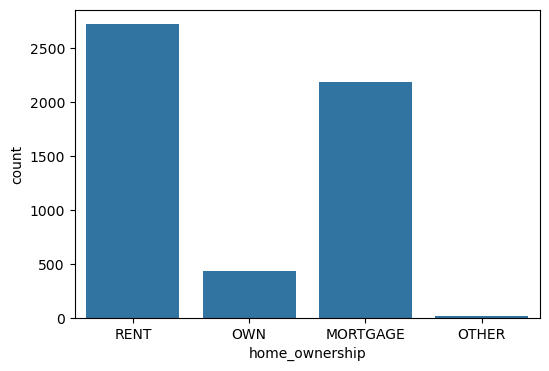

In [73]:
fig,ax=plt.subplots(figsize=(6,4))
sns.countplot(x='home_ownership', data=cust_cleaned[cust_cleaned['loan_status']=='Charged Off'])

**Analysing the purpose column**

<Axes: xlabel='count', ylabel='purpose'>

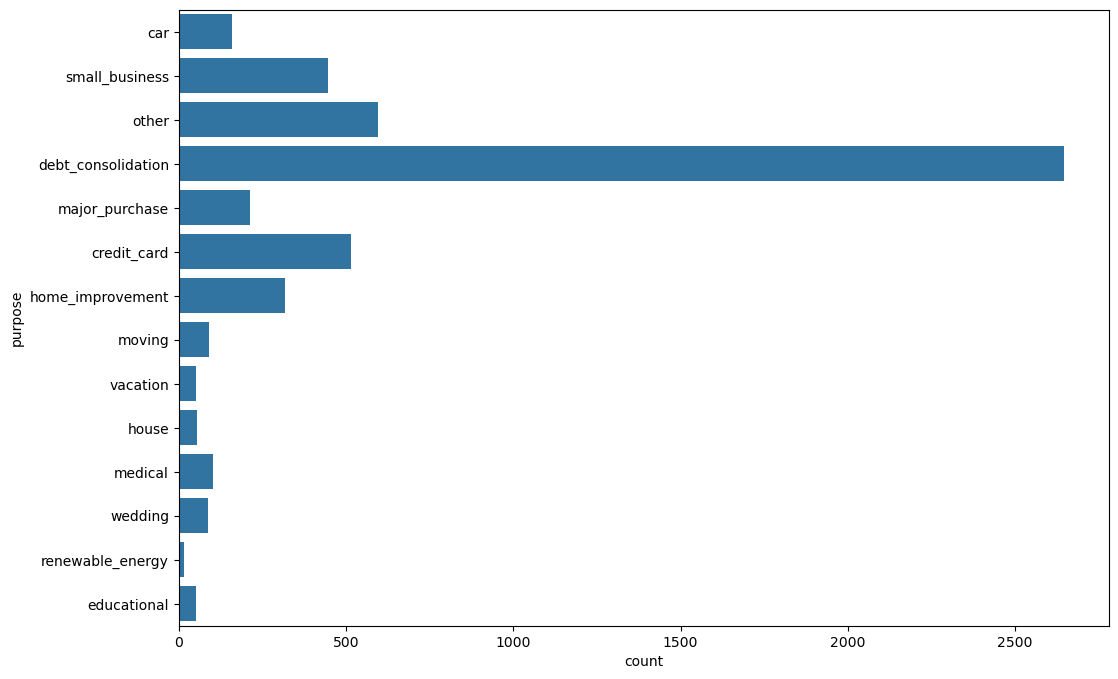

In [75]:
fig,ax=plt.subplots(figsize=(12,8))
sns.countplot(y='purpose',data=cust_cleaned[cust_cleaned.loan_status=='Charged Off'])

**Analysing the employee length column**

<Axes: xlabel='emp_length_years', ylabel='count'>

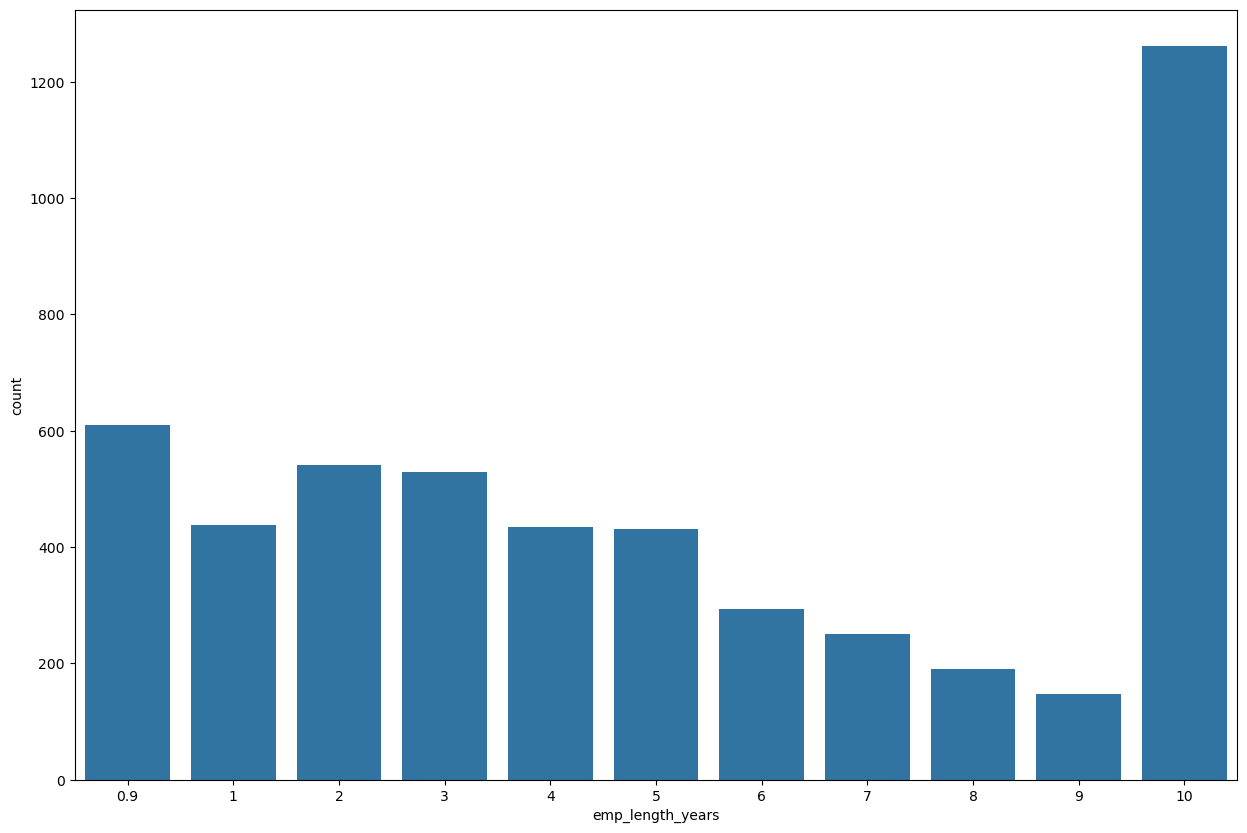

In [77]:
fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x='emp_length_years', data=cust_cleaned[cust_cleaned.loan_status == 'Charged Off'],order=['0.9','1','2','3','4','5','6','7','8','9','10'])

**creating bins for int_rate for numerical variable to make it a categorial one**

In [79]:
cust_cleaned['int_rate_groups'] = pd.cut(cust_cleaned['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-15%','15%-17%','17%-21%','21%-24%'])

In [80]:
cust_cleaned['int_rate_groups'] .value_counts()

int_rate_groups
9%-15%     13451
15%-17%    10151
5%-9%       9440
17%-21%     3082
21%-24%      457
Name: count, dtype: int64

<Axes: xlabel='int_rate_groups', ylabel='count'>

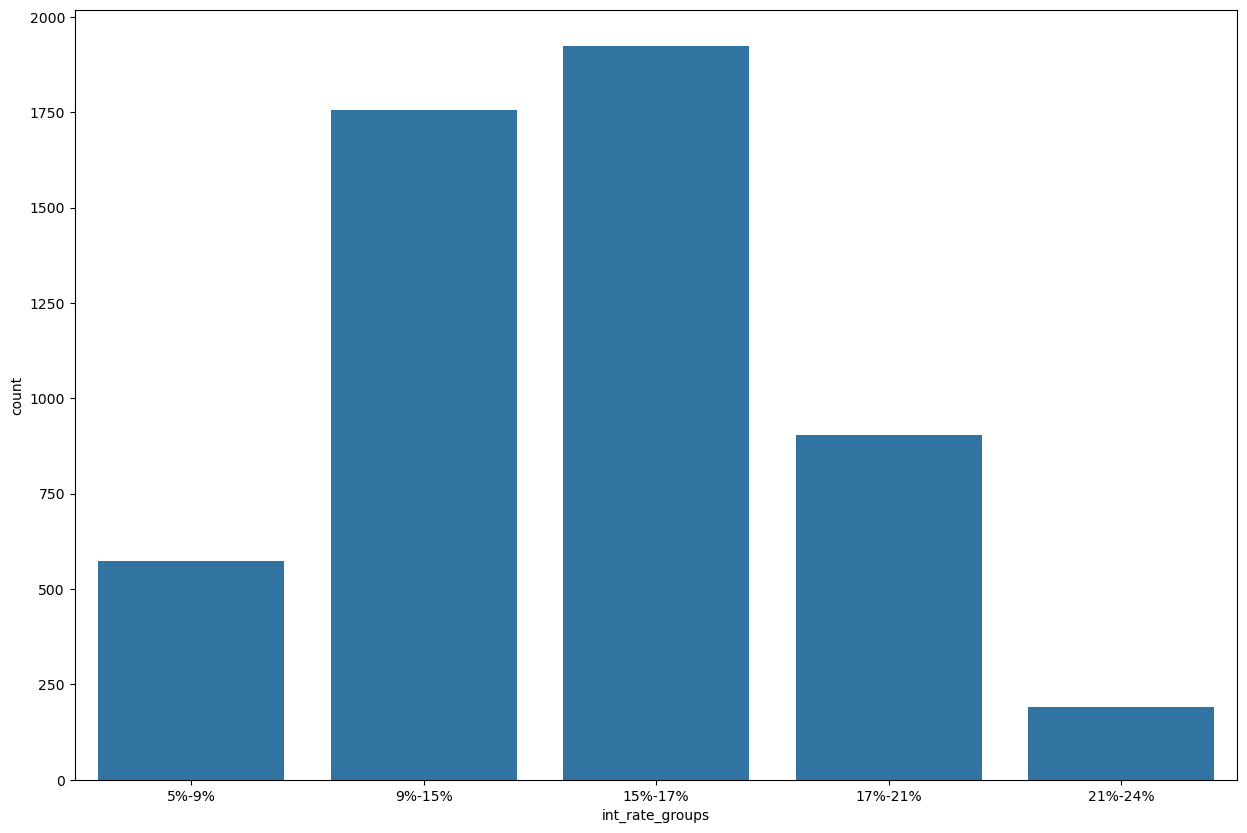

In [81]:
fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x='int_rate_groups', data=cust_cleaned[cust_cleaned.loan_status == 'Charged Off'])

**creating bins for total_acc column as having the lot of credit line might impact the barrowers repayment capacity**

In [83]:
cust_cleaned['total_acc_groups'] = pd.cut(cust_cleaned['total_acc'], bins=5,precision =0,labels=['2-19','19-37','37-55','55-74','74-90'])


<Axes: xlabel='total_acc_groups', ylabel='count'>

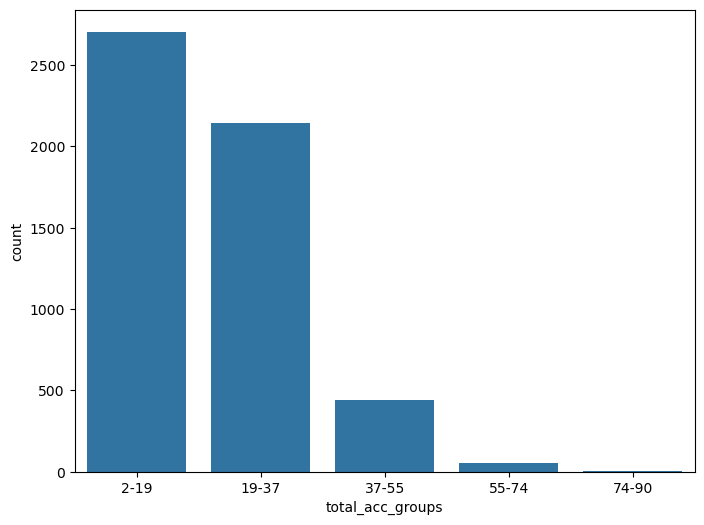

In [84]:

fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(x='total_acc_groups', data=cust_cleaned[cust_cleaned.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='term'>

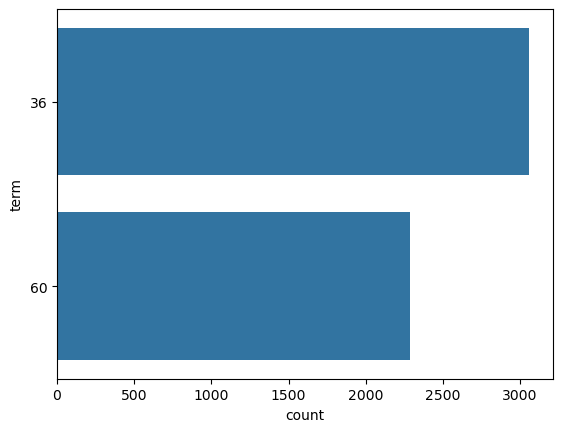

In [85]:
sns.countplot(y='term', data=cust_cleaned[cust_cleaned['loan_status']=='Charged Off'])

**Analysing total income**

In [87]:
cust_cleaned['annual_income_groups'] = pd.cut(cust_cleaned['annual_inc'], bins=5,precision =0,labels =['3k-30k','30k-57k','57k-84k','84k-111k','111k-139k'])

<Axes: xlabel='annual_income_groups', ylabel='count'>

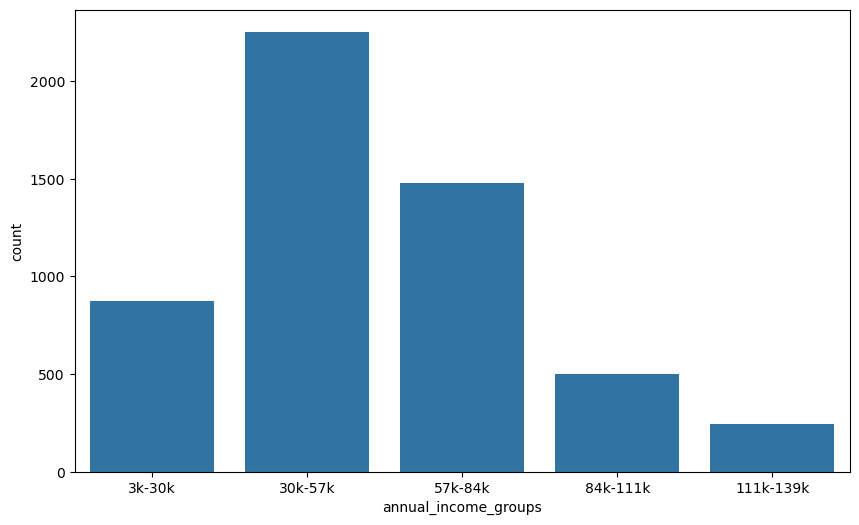

In [88]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_income_groups', data=cust_cleaned[cust_cleaned.loan_status == 'Charged Off'])

**Analysing open account groups**

In [90]:
cust_cleaned['open_acc_groups'] = pd.cut(cust_cleaned['open_acc'],bins = 5,precision =0,labels=['2-9','9-18','18-26','26-35','35-43'])

<Axes: xlabel='open_acc_groups', ylabel='count'>

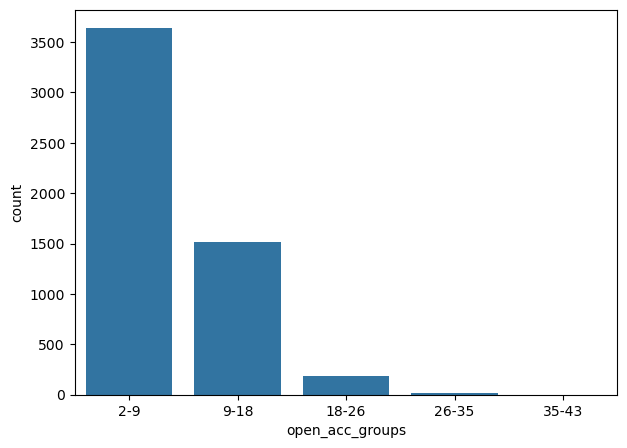

In [91]:
fig, ax = plt.subplots(figsize = (7,5))
sns.countplot(x='open_acc_groups', data=cust_cleaned[cust_cleaned.loan_status == 'Charged Off'])

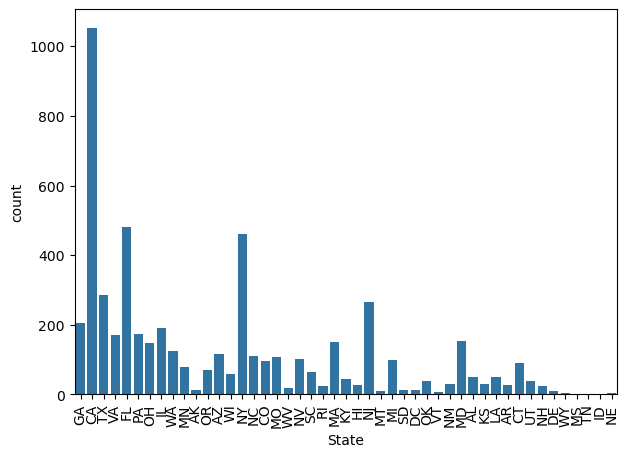

In [92]:
fig, ax = plt.subplots(figsize = (7,5))
sns.countplot(x='addr_state', data=cust_cleaned[cust_cleaned.loan_status == 'Charged Off'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.show()

**Analyzing loan amount groups**

In [94]:
cust_cleaned['loan_amount_groups'] = pd.cut(cust_cleaned['loan_amnt'], bins=7,precision =0,labels=['0-8k','8k-13k','13k-18k','18k-23k','23k-28k','28k-33k','33k-38k'])

<Axes: xlabel='loan_amount_groups', ylabel='count'>

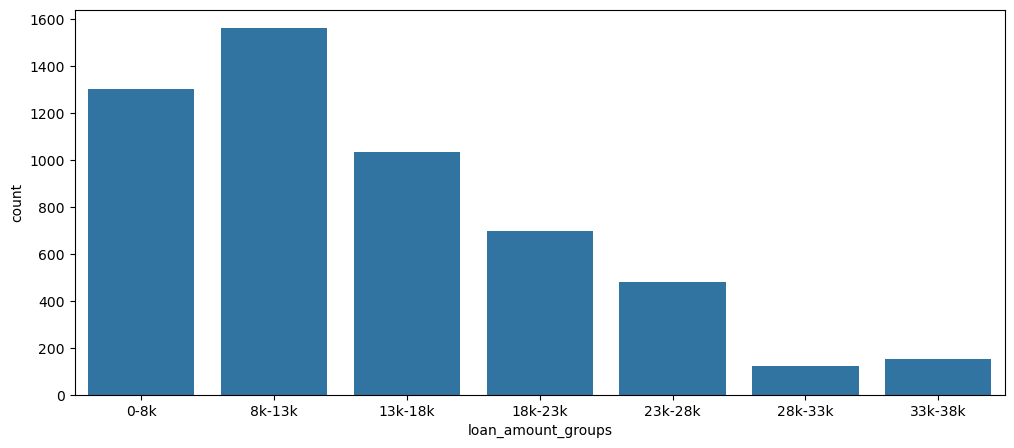

In [95]:
fig,ax = plt.subplots(figsize = (12,5))
sns.countplot(x='loan_amount_groups', data=cust_cleaned[cust_cleaned['loan_status']=='Charged Off'])

**Observations**
**From the above charts below inferences can be made**
**The person is more likely to default if he falls under below category's**
- The people with Grade B and particualry of grade B5
- The person who is in rent has defaulted more, may be because of more rental commitments
- The person with the purpose of debt consolidation has defaulted more when compared to others
- The employee's with equal to or more than 10 years of experience might default
- The loans with interest percent of 15%-17% has defaulted more , should consider giving the loan with less interest rate
- when the total account is between 2 and 19
- Person having 36 months as tenure is defaulting when compared to 60 months tenure
- Persons with annual income of 30K-57K is defaulting more
- Having 2 to 9 open account increases the changes of defaulting
- persons with the loan amount of 8K to 13K has defaulted more
- person from CA state has defaulted more

**Bivariate Analysis**

-Analysing annual income numerical column with other columns

**Annual income vs home_ownership**

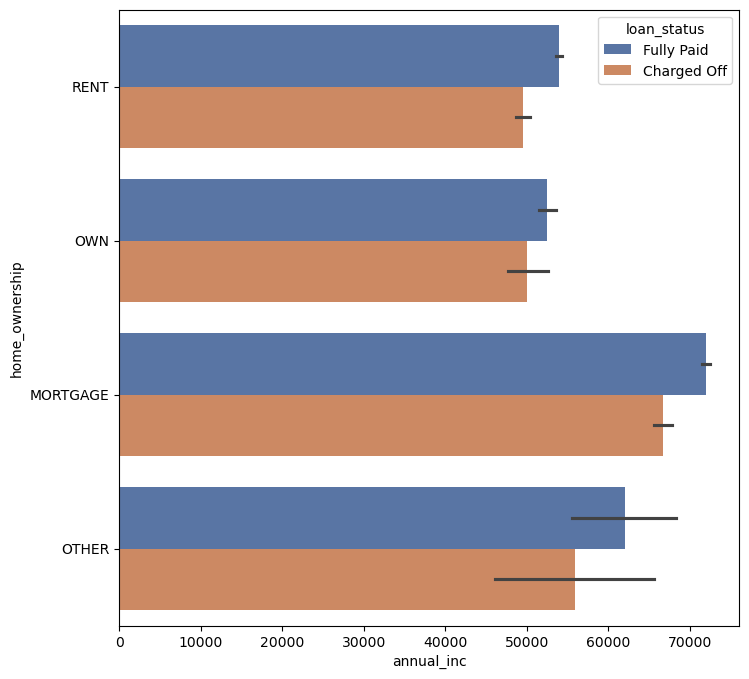

In [99]:
#comparing annual income with home ownership
plt.figure(figsize=(8,8))
sns.barplot(data =cust_cleaned,x='annual_inc', y='home_ownership', hue ='loan_status',palette="deep" )
plt.show()

**Observations**
- Persons with Mortage having the annual income of 60k to 70k has more possibility of defaulting

**Annual income vs loan purpose**

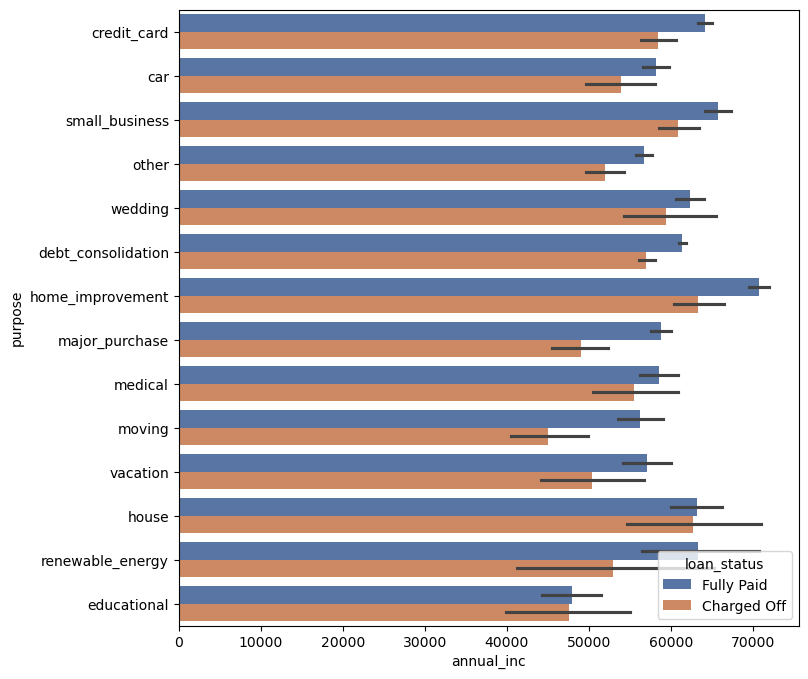

In [102]:
plt.figure(figsize=(8,8))
sns.barplot(data =cust_cleaned,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

**observation**
- person who is taking loan for home improvement and if he has salary of 60k to 70k then he is likely to default

**Annual income vs verification status**

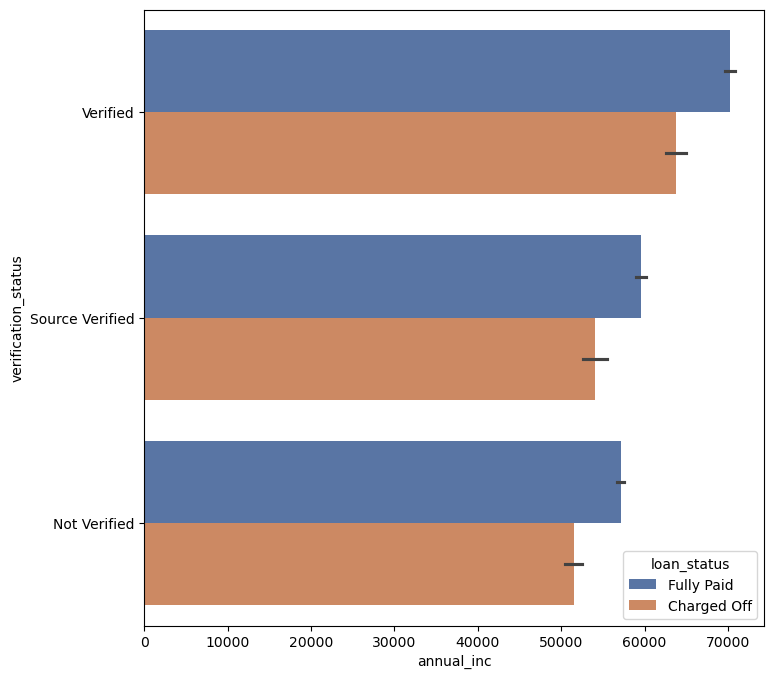

In [105]:
plt.figure(figsize=(8,8))
sns.barplot(data =cust_cleaned,x='annual_inc', y='verification_status', hue ='loan_status',palette="deep")
plt.show()

**Observation**

-person with verified status who is having the salary range from 65K to 70K is likely to default

**Loan amount vs employee lenght in year**

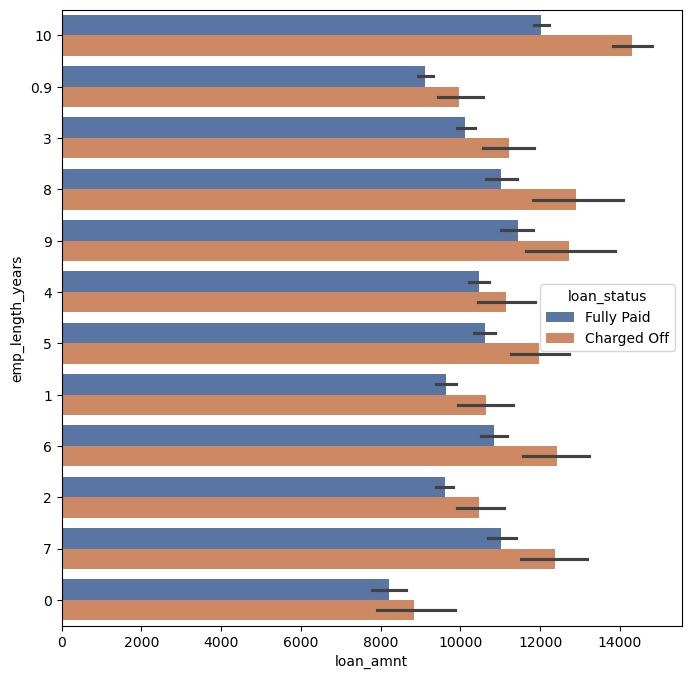

In [108]:
plt.figure(figsize=(8,8))
sns.barplot(data =cust_cleaned,x='loan_amnt', y='emp_length_years', hue ='loan_status',palette="deep")
plt.show()

**Observation**

- Employee with equal to or more than 10 years of experience has high amount of loan approved and they have charged off more 

**MultiVariate analysis**

In [111]:
# Creating Dataframe for select columns for which we need headmap
corr_df = cust_cleaned[['loan_amnt','funded_amnt_inv','annual_inc', 'installment','emp_length_years','open_acc' ]]


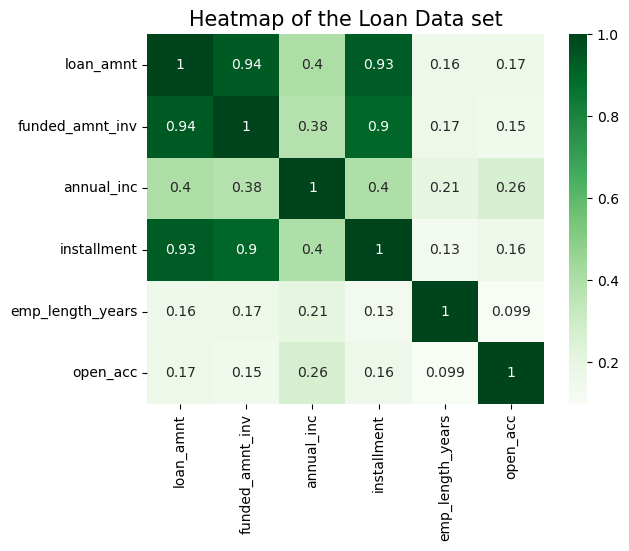

In [112]:
#Heatmap Creation / Generation
sns.heatmap(corr_df.corr(),annot=True, cmap='Greens')
plt.title('Heatmap of the Loan Data set', size=15)
plt.show()

**Positive corelation between the loan amount, funded amount and the installment is seen**

